# **<font color="#FFD700">BITCOIN PRICE HISTORY</font>**

## **<font color="#17A2B8">A. Explore and Load data</font>**

### **<font color="#33CC33">1. Learn about data</font>**

#### **<font>1.1. Reason and Purpose of analysis</font>**

**Tổng quát về Bitcoin:**
Bitcoin là tiền điện tử đầu tiên và phổ biến nhất, ra đời vào năm 2009 bởi người ẩn danh hoặc nhóm người có tên Satoshi Nakamoto. Được xây dựng trên nền tảng công nghệ blockchain, Bitcoin cho phép giao dịch trực tiếp giữa các bên mà không cần trung gian ngân hàng. Nó có tính phi tập trung và độc lập khỏi các cơ quan tài chính truyền thống.

**Xu hướng Bitcoin:**
Trong thời gian từ khi ra mắt đến nay, Bitcoin đã trải qua nhiều giai đoạn tăng giá mạnh và sụt giảm. Từ một tài sản không có giá trị ban đầu, Bitcoin đã tăng vọt lên trở thành một tài sản đầu tư hấp dẫn. Sự biến đổi về giá là điều thường xuyên xảy ra, và nguyên nhân có thể bao gồm tin tức thị trường, sự kiện toàn cầu, thay đổi quy định, và tâm lý thị trường.

Những người quan tâm đến Bitcoin thường xem xét cả hai hướng tiềm năng: **tăng giá** và **sụt giảm**. Việc phân tích xu hướng giá là cách để dự đoán sự biến đổi trong tương lai, giúp người tham gia thị trường và nhà đầu tư có cái nhìn rõ ràng hơn về cơ hội và rủi ro.

#### **<font>1.2. Orgin, license, trust, collection and ethics of data</font>**

* Chủ đề bitcoin này liên quan đến tài chính và đầu tư.

* Dữ liệu được lấy từ Yahoo Finance ( *Link*:  [Bitcoin Price]("https://finance.yahoo.com/quote/BTC-USD/history/") ).

* Data license: Không.

* Lấy dữ liệu bằng cách sort theo nhu cầu , ấn Apply. Sau đó ấn Download để tải file dữ liệu *.csv xuống.

![Ảnh Header](./public//images/filter_image.png)




### **<font color="#33CC33">2. Import libraries and load data</font>**

#### **<font>2.1. Necessery libraries</font>**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings("ignore")

#### **<font>2.2. Load data</font>**

In [30]:
df_bitcoin=pd.read_csv('data/BTC-USD.csv')

In [31]:
df_bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3259,2023-08-20,26096.861328,26260.681641,26004.314453,26189.583984,26189.583984,9036580420
3260,2023-08-21,26188.691406,26220.201172,25846.087891,26124.140625,26124.140625,13371557893
3261,2023-08-22,26130.748047,26135.507813,25520.728516,26031.656250,26031.656250,14503820706
3262,2023-08-23,26040.474609,26786.898438,25804.998047,26431.640625,26431.640625,16985265785


## **<font color="#17A2B8">B. Explore data</font>**

### **<font color="#33CC33">1. Check data</font>**

Dữ liệu chỉ có duy nhất 1 file BTC-USD.csv

In [32]:
df_bitcoin.shape

(3264, 7)

In [33]:
df_bitcoin.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Tập dữ liệu bao gồm 7 cột và 3262 dòng.

| Index | Column name | Meaning |
| :-: | :-: | :-: |
| 1 | Date | Ngày tháng ghi nhận dữ liệu |
| 2 | Open |  Giá mở cửa giao dịch Bitcoin vào ngày đó |
| 3 | High |  Giá cao nhất mà Bitcoin đạt được trong ngày |
| 4 | Low | Giá thấp nhất mà Bitcoin giảm xuống trong ngày |
| 5 | Close |  Giá đóng cửa giao dịch Bitcoin vào ngày đó |
| 6 | Adj Close | Giá đóng cửa giao dịch Bitcoin sau khi đã được điều chỉnh |
| 7 | Volume | Khối lượng giao dịch của Bitcoin trong ngày đó |


Mỗi dòng bao gồm thông tin giá cả của bitcoin trong 1 ngày.

In [34]:
for index,item in enumerate(df_bitcoin.columns):
    print(f'Type of {item}: {df_bitcoin[item].dtype}')

Type of Date: object
Type of Open: float64
Type of High: float64
Type of Low: float64
Type of Close: float64
Type of Adj Close: float64
Type of Volume: int64


* Cột Date thể hiện giá trị thời gian mà kiểu dữ liệu là object, nên chuyển về DateTime.
* Các cột còn lại đều là thuộc tính giá cả và khối lượng bitcoin nên kiểu dữ liệu là float64 ( numerical ), thuận lợi cho việc tính toán.

### **<font color="#33CC33">2. Pre-Processing data</font>**

In [35]:
df_bitcoin.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* Tập dữ liệu dầy đủ, không có giá trị Nan.

In [36]:
check_duplicated=df_bitcoin[df_bitcoin.duplicated(subset=['Date'])]
check_duplicated

,Date,Open,High,Low,Close,Adj Close,Volume


* Tập dữ liệu không có dòng nào trong cột Date bị trùng lặp
    
    -> Dữ liệu chính xác.

**Chuyển đổi kiểu dữ liệu cột Date và Volume**

In [37]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date']).dt.strftime('%d-%m-%Y')
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'], format='%d-%m-%Y')
df_bitcoin['Date']

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
3259   2023-08-20
3260   2023-08-21
3261   2023-08-22
3262   2023-08-23
3263   2023-08-24
Name: Date, Length: 3264, dtype: datetime64[ns]

In [38]:
df_bitcoin['Volume'] = df_bitcoin['Volume'].apply(lambda x: "{:.0f}".format(x))
df_bitcoin['Volume']=pd.to_numeric(df_bitcoin["Volume"], errors="coerce")

## **<font color="#17A2B8">C. Visualize Data</font>**

**<font color="#FFFF66">Sử dụng kỹ thuật: Manipulate View </font>**
* Kỹ thuật này cho phép người dùng chọn khoảng thời gian mong muốn và điều chỉnh thông số theo nhu cầu.
* Áp dụng **Manipulate View** giúp tăng hiệu quả trực quan.

### **<font color="#33CC33">1. Giá Bitcoin theo thời gian</font>**

In [39]:
min_date=df_bitcoin['Date'].min()
max_date=df_bitcoin['Date'].max()

start_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(), description='From: ', value=min_date.date())
end_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(),description='To: ',value=max_date.date())

def draw_Plot(start,end):
    start=pd.to_datetime(start)
    end=pd.to_datetime(end)
    data_filter=df_bitcoin[(df_bitcoin['Date']>=start)&(df_bitcoin['Date']<=end)]
    plt.figure(figsize=(20,12))
    plt.plot(data_filter['Date'], data_filter['Close'],label='Close Price')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.title(f'Bitcoin Close Price from {start.strftime("%d/%m/%Y")} to {end.strftime("%d/%m/%Y")}',fontsize=22)
    plt.show()

update_plot=widgets.interactive(draw_Plot,start=start_date_widget,end=end_date_widget)
display(update_plot)


interactive(children=(DatePicker(value=datetime.date(2014, 9, 17), description='From: ', max=datetime.date(202…

**Nhận xét**
* Từ năm 2014 đến 2017, giá bitcoin tăng nhưng không nhanh. Đến gần cuối năm 2018, giá bitcoin bắt đầu tăng mạnh và đạt ngưỡng cao nhất vào cuối năm 2021, sau đó trượt dài đến hiện tại.
*  Trong từng khoảng thời gian, giá bitcoin sẽ bắt đầu tăng đến cực đại rồi giảm dần. Từ đó, có thể xác định xu hướng giá cả trong tương lai.
* Nhìn chung, giá cả bitcoin biến động liên tục qua các năm và có xu hướng tăng.

### **<font color="#33CC33">2. Phân tích mối quan hệ giá đóng và giá mở theo thời gian</font>**

In [40]:
min_date=df_bitcoin['Date'].min()
max_date=df_bitcoin['Date'].max()

start_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(), description='From: ', value=min_date.date())
end_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(),description='To: ',value=max_date.date())

def draw_Plot(start,end):
    start=pd.to_datetime(start)
    end=pd.to_datetime(end)
    data_filter=df_bitcoin[(df_bitcoin['Date']>=start)&(df_bitcoin['Date']<=end)]
    plt.figure(figsize=(20,12))
    plt.plot(data_filter['Date'], data_filter['Open'],label='Open Price')
    plt.plot(data_filter['Date'], data_filter['Close'],label='Close Price')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.title(f'Bitcoin Open Price and Close Price from {start.strftime("%d/%m/%Y")} to {end.strftime("%d/%m/%Y")}',fontsize=22)
    plt.show()

update_plot=widgets.interactive(draw_Plot,start=start_date_widget,end=end_date_widget)
display(update_plot)


interactive(children=(DatePicker(value=datetime.date(2014, 9, 17), description='From: ', max=datetime.date(202…

**Nhận xét**
* **Xu hướng giá cả:** Nhìn chung, giá đóng của bitcoin sẽ cao hơn giá mở. Điều này thể hiện sự tăng giá liên tục trong thời gian.

* **Sự ổn định:** Giá đóng cao hơn giá mở liên tục thể hiện sự ổn định và độ tin cậy trong việc tăng giá. Điều này làm giảm sự biến động ngắn hạn. Tuy nhiên cũng có những giai đoạn bitcoin giảm mạnh và giao dịch không ổn định, với biên độ dao động rộng. Lúc đó mối quan hệ giữa giá mở và giá đóng có thể thay đổi và không còn xu hướng tăng giá rõ ràng.

* **Sự quan tâm và đầu tư:** Khi giá đóng cao hơn giá mở liên tục, điều này có thể cho thấy sự quan tâm và tin tưởng của các nhà đầu tư vào sự tăng giá của bitcoin. Người mua có thể tin tưởng rằng giá sẽ tiếp tục tăng theo xu hướng.

* **Xác định thời điểm mua/bán:** Trong một xu hướng tăng giá, sự chênh lệch giữa giá đóng và giá mở cũng có thể được sử dụng để xác định các điểm mua hoặc bán tiềm năng. Các khoảng thấp hơn có thể là cơ hội mua, trong khi các khoảng cao hơn có thể là cơ hội bán.

### **<font color="#33CC33">3. Phân tích mối quan hệ giữa giá cao nhất và giá thấp nhất</font>**

In [41]:
min_date=df_bitcoin['Date'].min()
max_date=df_bitcoin['Date'].max()

start_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(), description='From: ', value=min_date.date())
end_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(),description='To: ',value=max_date.date())

def draw_Plot(start,end):
    start=pd.to_datetime(start)
    end=pd.to_datetime(end)
    data_filter=df_bitcoin[(df_bitcoin['Date']>=start)&(df_bitcoin['Date']<=end)]
    plt.figure(figsize=(20,12))
    plt.plot(data_filter['Date'], data_filter['High'],label='High Price')
    plt.plot(data_filter['Date'], data_filter['Low'],label='Low Price')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.title(f'Bitcoin High Price and Low Price from {start.strftime("%d/%m/%Y")} to {end.strftime("%d/%m/%Y")}',fontsize=22)
    plt.show()

update_plot=widgets.interactive(draw_Plot,start=start_date_widget,end=end_date_widget)
display(update_plot)


interactive(children=(DatePicker(value=datetime.date(2014, 9, 17), description='From: ', max=datetime.date(202…

* **Sự biến động quanh từng giai đoạn:** Từ biểu đồ cho thấy sự biến động mạnh mẽ xung quanh từng giai đoạn. Có những thời kỳ biên độ giá mở rộng, cho thấy sự biến động lớn và tâm lý thị trường không ổn định. Điều này thường xảy ra trong các giai đoạn có sự thay đổi lớn về yếu tố kinh tế, chính trị, hoặc tình hình thị trường chung.

* **Độ biến động trong thời kỳ khác biệt:** Trong những giai đoạn khác biệt, biên độ giá của Bitcoin thay đổi. Có những giai đoạn biên độ giá mở rộng, cho thấy sự biến động lớn hơn và sự không chắc chắn trong tâm lý thị trường. Ngược lại, có những giai đoạn biên độ giá thu hẹp, cho thấy sự ổn định hơn trong tâm lý thị trường.

* **Sự ảnh hưởng của yếu tố thị trường toàn cầu:** Các sự kiện và yếu tố thị trường toàn cầu cũng ảnh hưởng đến biên độ giá của Bitcoin. Ví dụ, tác động của đại dịch COVID-19 vào năm 2020 đã làm tăng biên độ giá, thể hiện sự tác động của yếu tố toàn cầu đối với thị trường tiền điện tử nói chung và bitcoin nói riêng.

### **<font color="#33CC33">4. Phân tích khối lượng giao dịch của bitcoin theo thời gian</font>**

In [42]:
min_date=df_bitcoin['Date'].min()
max_date=df_bitcoin['Date'].max()

start_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(), description='From: ', value=min_date.date())
end_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(),description='To: ',value=max_date.date())

def draw_Plot(start,end):
    start=pd.to_datetime(start)
    end=pd.to_datetime(end)
    data_filter=df_bitcoin[(df_bitcoin['Date']>=start)&(df_bitcoin['Date']<=end)]
    plt.figure(figsize=(20,12))
    plt.plot(data_filter['Date'], data_filter['Volume'],label='Volume')
    plt.xticks(fontsize=16)
    plt.yticks( fontsize=16)
    plt.legend(fontsize=16)
    plt.title(f'Bitcoin volume from {start.strftime("%d/%m/%Y")} to {end.strftime("%d/%m/%Y")}',fontsize=22)
    plt.show()

update_plot=widgets.interactive(draw_Plot,start=start_date_widget,end=end_date_widget)
display(update_plot)


interactive(children=(DatePicker(value=datetime.date(2014, 9, 17), description='From: ', max=datetime.date(202…

**Nhận xét**

Trong giai đoạn từ năm 2015 đến nay, khối lượng giao dịch của bitcoin đã có sự biến động đáng kể theo thời gian. Khoảng thời gian từ năm 2014 đến đầu năm 2017, khối lượng giao dịch khá thấp và ổn định ở mức khoảng từ 1 đến 5 trăm triệu đơn vị mỗi ngày. Tuy nhiên, từ sau đó đến đầu năm 2018, khối lượng giao dịch bắt đầu tăng lên đáng kể và đạt đỉnh cao ở mức gần 25 tỷ đơn vị mỗi ngày. Sau đó, khối lượng giao dịch giảm xuống và lại tăng nhanh chóng và đạt mức cao nhất ( hơn 350 tỷ ) đơn vị mỗi ngày .Cuối cùng, khối lượng giao dịch giảm dần và duy trì ở mức từ dưới 10 tỷ đến 50 tỷ đơn vị mỗi ngày từ đó đến nay. 

Sự biến động này có thể phản ánh sự quan tâm và đánh giá của thị trường đối với bitcoin và các yếu tố kinh tế, chính trị, công nghệ có liên quan trong suốt thời gian qua.

### **<font color="#33CC33">5. Phân tích mối quan hệ giữa giá đóng và đường trung bình động (MA100)</font>**

In [43]:
min_date=df_bitcoin['Date'].min()
max_date=df_bitcoin['Date'].max()

start_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(), description='From: ', value=min_date.date())
end_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(),description='To: ',value=max_date.date())

def draw_Plot(start,end):
    start=pd.to_datetime(start)
    end=pd.to_datetime(end)

    data_filter=df_bitcoin[(df_bitcoin['Date']>=start)&(df_bitcoin['Date']<=end)]
    data_filter['SMA100'] = data_filter['Close'].rolling(window=100).mean()

    data_filter['Signal'] = 0
    data_filter.loc[data_filter['Close'] > data_filter['SMA100'], 'Signal'] = 1  
    data_filter.loc[data_filter['Close'] < data_filter['SMA100'], 'Signal'] = -1  

    plt.figure(figsize=(18,10))
    plt.plot(data_filter['Date'], data_filter['Close'])
    plt.plot(data_filter['Date'], data_filter['SMA100'])
   
    buy_signals = data_filter[data_filter['Signal'] == 1]
    plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='g', label='Buy Signal')
    sell_signals = data_filter[data_filter['Signal'] == -1]
    plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='r', label='Sell Signal')

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(['Close', 'SMA100'],fontsize=20)
    plt.title('Close and Mean Average', fontsize=30)
    plt.show()

update_plot=widgets.interactive(draw_Plot,start=start_date_widget,end=end_date_widget)
display(update_plot)


interactive(children=(DatePicker(value=datetime.date(2014, 9, 17), description='From: ', max=datetime.date(202…

**Đường giá đóng (Close Price):** cho thấy biến động hàng ngày của giá Bitcoin.

**Đường SMA100 (Simple Moving Average 100):** thể hiện xu hướng dài hạn của giá. Khi giá đóng vượt qua đường SMA100 từ dưới lên, có thể tượng trưng cho sự tăng giá và ngược lại.

**Tín hiệu mua và bán:**
Các điểm tín hiệu mua được biểu thị bằng mũi tên hướng lên (màu xanh). Đây là thời điểm mà giá đóng vượt qua đường SMA100 từ dưới lên, có thể tượng trưng cho sự tăng giá sắp tới.
Các điểm tín hiệu bán được biểu thị bằng mũi tên hướng xuống (màu đỏ). Đây là thời điểm mà giá đóng đi xuống dưới đường SMA100, có thể tượng trưng cho sự giảm giá sắp tới.

**Phân tích tín hiệu:**
Tín hiệu mua và bán có thể giúp nhầ đầu tư nhận ra các điểm đảo chiều trong xu hướng và đưa ra quyết định về việc mua vào hoặc bán ra thị trường.
Tuy nhiên, cần xem xét kỹ càng và không nên dựa quá mức vào tín hiệu một cách độc lập. Điều này là do tín hiệu có thể không luôn chính xác và thị trường có thể thay đổi đột ngột.
 
**Sự kết hợp giữa xu hướng và tín hiệu:**
Đường SMA100 thường đại diện cho xu hướng dài hạn và có thể giúp bạn xác định xu hướng chung của thị trường.
Tín hiệu mua và bán có thể cung cấp sự hỗ trợ cho quyết định của nhà đầu tư và nên cân nhắc kết hợp với các yếu tố khác trong phân tích.

### **<font color="#33CC33">6. Phân tích chỉ báo Bolling Bands theo thời gian</font>**

In [44]:
min_date=df_bitcoin['Date'].min()
max_date=df_bitcoin['Date'].max()

start_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(), description='From: ', value=min_date.date())
end_date_widget=widgets.DatePicker(min=min_date.date(),max=max_date.date(),description='To: ',value=max_date.date())


def draw_Plot(start,end,window_size):
    start=pd.to_datetime(start)
    end=pd.to_datetime(end)
    data_filter=df_bitcoin[(df_bitcoin['Date']>=start)&(df_bitcoin['Date']<=end)]
    data_filter['SMA'] = data_filter['Close'].rolling(window=window_size).mean()
    std_dev = data_filter['Close'].rolling(window=window_size).std()
    data_filter['Upper_Band'] = data_filter['SMA'] + 2 * std_dev
    data_filter['Lower_Band'] = data_filter['SMA'] - 2 * std_dev
    plt.figure(figsize=(12, 6))
    plt.title('Bitcoin Price and Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid()
    plt.plot(data_filter['Date'], data_filter['Close'], label='Bitcoin Price', color='blue')
    plt.plot(data_filter['Date'], data_filter['SMA'], label=f'SMA{window_size}', color='red')
    plt.plot(data_filter['Date'], data_filter['Upper_Band'], label='Upper Band', linestyle='--', color='green')
    plt.plot(data_filter['Date'], data_filter['Lower_Band'], label='Lower Band', linestyle='--', color='green')
    plt.fill_between(data_filter['Date'], data_filter['Upper_Band'], data_filter['Lower_Band'], color='lightgray', alpha=0.3)
    plt.legend()
    plt.show()

window_size_slider = widgets.IntSlider(value=100, min=10, max=200, step=1, description='Window Size:')

update_plot=widgets.interactive(draw_Plot,start=start_date_widget,end=end_date_widget,window_size=window_size_slider)
display(update_plot)

interactive(children=(DatePicker(value=datetime.date(2014, 9, 17), description='From: ', max=datetime.date(202…

**1. Bollinger Bands:**
* Bollinger Bands là một công cụ phân tích kỹ thuật được sử dụng để đo lường biến động giá trong thị trường tài chính.
* Dải Bollinger bao gồm ba đường: đường trung bình động (thường là đường trung bình động đơn giản, chẳng hạn như SMA20 trong trường hợp này), đường Upper Band (đường trên) và đường Lower Band (đường dưới).
Upper Band thường được tính bằng cách cộng một định số lần độ lệch chuẩn (thường là 2) với đường trung bình động.
* Lower Band thường được tính bằng cách trừ một định số lần độ lệch chuẩn (thường là 2) từ đường trung bình động.


**2. Ứng dụng Bollinger Bands:**
* **Đo lường biến động:** Bollinger Bands giúp đo lường biến động giá Bitcoin trong một khoảng thời gian. Dải mở rộng khi biến động tăng và thu hẹp khi biến động giảm.
* **Xác định mức quá mua/quá bán:** Upper Band và Lower Band cho biết mức độ quá mua (khi gần Upper Band) và quá bán (khi gần Lower Band), giúp đưa ra quyết định mua/bán.
* **Phát hiện điểm đảo chiều:** Khi giá tiếp cận Upper/Lower Band, có thể xuất hiện điểm đảo chiều hoặc điều chỉnh giá.
* **Xác định xu hướng dài hạn:** Kết hợp với đường trung bình động, Bollinger Bands giúp nhận biết xu hướng dài hạn của bitcoin.
* **Tìm điểm mua/bán cẩn trọng:** Khi giá tiếp cận đường trung bình động, nhà đầu tư có thể xem xét việc mua/bán cẩn trọng hơn.

**3. Nhận Xét và Phân Tích:**
* Từ năm 2014 đến đầu năm 2017, 4 đường ( upper band, lower band, SMA100, bitcoin price ) chặt chẽ với nhau, và dải Bollinger thu hẹp. Điều này cho thấy thị trường bitcoin trong giai đoạn này có sự ổn định, biến động giá tương đối nhỏ.
* Từ sau năm 2017 đến hiện tại, dải Bollinger mở rộng ra rất nhiều. Điều này cho thấy thị trường bitcoin có sự biến động rất mạnh, có sự tăng đột ngột trong biến động giá. 
* Ở một số thời điểm như đầu năm 2018, giữa năm 2019, đầu và cuối năm 2021, giá bitcoin đâm thủng đường Upper Band từ dưới lên cho thấy có sự tăng giá mạnh. Điều này có thể khiến nhà đầu tư quan tâm đến việc giá có thể tăng tiếp hay sẽ có một điều chỉnh ngắn hạn. 
* Tuy nhiên cũng có một số thời điểm như 3/2020, 11/2022, giá bitcoin đâm thủng đường Lower Band từ trên xuống dưới cho thấy có sự lao dốc mạnh về giá cả bitcoin. Điều này có thể khiến nhà đầu tư quan tâm đến việc giá có thể giảm tiếp hay sẽ có một phục hồi ngắn hạn.

* Nhìn chung, dải Bollinger Bands có thể giúp nhà đầu tư dự đoán một phần xu hướng của giai đoạn tiếp theo đối với Bitcoin. Tuy nhiên, việc dự đoán không hoàn toàn đúng và có thể sai nếu có một sự kiện lớn diễn ra hoặc xu hướng thị trường chung uptrend/downtrend mạnh. Khi sử dụng chỉ báo này, nhà đầu tư nên kết hợp với các chỉ báo khác và kết hợp phân tích cơ bản nhưng xu hướng thị trường tiền điện tử (cryptocurrency) để đảm bảo tính an toàn cho quyết định đầu tư.

## **<font color="#17A2B8">D. Predict</font>**

### **<font color="#33CC33">1. Giá đóng</font>**

#### **<font>1.1. Linear Regression</font>**

In [45]:
test_size=200

train_data=df_bitcoin[0:-test_size]
test_data=df_bitcoin[-test_size:]

x_train=train_data[['Open','High','Low','Volume']]
y_train=train_data['Close']
x_test=test_data[['Open','High','Low','Volume']]
y_test=test_data['Close']


In [46]:
linear_regression_model=LinearRegression()
linear_regression_model.fit(x_train,y_train)
y_pred=linear_regression_model.predict(x_test)

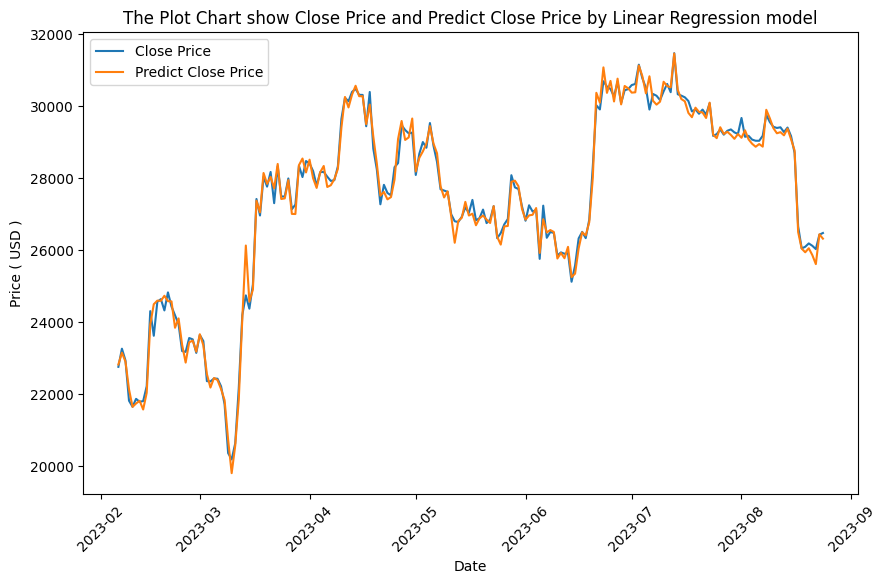

In [47]:
plt.figure(figsize=(10,6))
plt.plot(test_data['Date'],y_test,label='Close Price')
plt.plot(test_data['Date'],y_pred,label='Predict Close Price')
plt.xlabel('Date')
plt.ylabel('Price ( USD )')
plt.xticks(rotation=45)
plt.title('The Plot Chart show Close Price and Predict Close Price by Linear Regression model')
plt.legend()
plt.show()

In [48]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 53633.25119262818
Root Mean Squared Error: 231.58853856058633
Mean Absolute Error: 160.66645075393097
R-squared: 0.9920110104778009


#### **<font>1.2. XGBRegressor model</font>**

In [49]:
warnings.filterwarnings("ignore")

xgboost_regressor_model=xgb.XGBRegressor()
param_grid = {"max_depth": [4, 5, 6],
            "n_estimators": [500, 600, 700],
            "learning_rate": [0.01, 0.015]}
            
search = GridSearchCV(xgboost_regressor_model, param_grid, cv=5).fit(x_train, y_train)
print("The best hyperparameters are ",search.best_params_)

In [ ]:
warnings.filterwarnings("ignore")
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

xgboost_regressor_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred=xgboost_regressor_model.predict(x_test)

array([22870.014, 22923.137, 23082.588, 22282.064, 21633.867, 21447.932,
       21459.207, 21670.385, 21778.062, 23316.62 , 24012.848, 24067.893,
       27030.387, 23851.148, 23971.178, 23585.523, 23910.508, 23910.508,
       23412.482, 22928.557, 23030.623, 23492.736, 22867.152, 23802.287,
       22801.127, 22239.951, 21857.982, 22537.033, 22479.879, 22172.754,
       21814.58 , 20544.727, 19962.791, 20304.53 , 21281.217, 23268.422,
       23902.87 , 23719.879, 23993.283, 26912.363, 27030.451, 27104.035,
       27031.775, 26947.398, 28884.277, 28844.094, 27082.127, 27195.703,
       26991.115, 26947.277, 27151.865, 27015.135, 28895.023, 26892.365,
       28854.914, 26991.115, 26956.04 , 27026.361, 28956.93 , 26991.115,
       26991.115, 26973.695, 26991.115, 29051.455, 30215.81 , 30043.457,
       30187.94 , 30169.71 , 30124.09 , 30105.318, 29673.014, 30205.52 ,
       29166.012, 28878.934, 27015.135, 26991.115, 27195.703, 26947.277,
       26947.277, 28913.46 , 29026.846, 29544.342, 

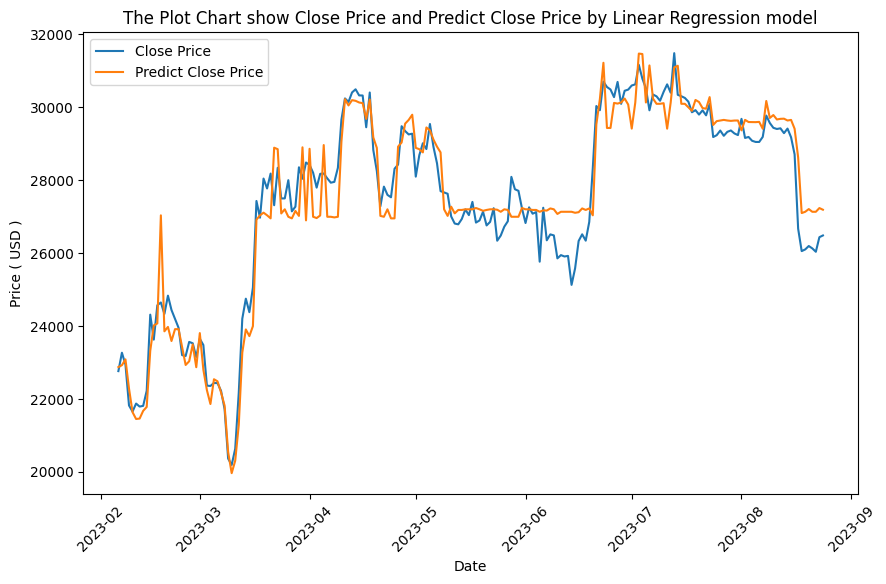

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_data['Date'],y_test,label='Close Price')
plt.plot(test_data['Date'],y_pred,label='Predict Close Price')
plt.xlabel('Date')
plt.ylabel('Price ( USD )')
plt.xticks(rotation=45)
plt.title('The Plot Chart show Close Price and Predict Close Price by Linear Regression model')
plt.legend()
plt.show()

In [ ]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 466388.5283118041
Root Mean Squared Error: 682.9264442908944
Mean Absolute Error: 535.6250976724999
R-squared: 0.9305286742253471


#### **<font>1.3. Random Forest</font>**

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(x_train, y_train)
y_pred = random_forest_model.predict(x_test)


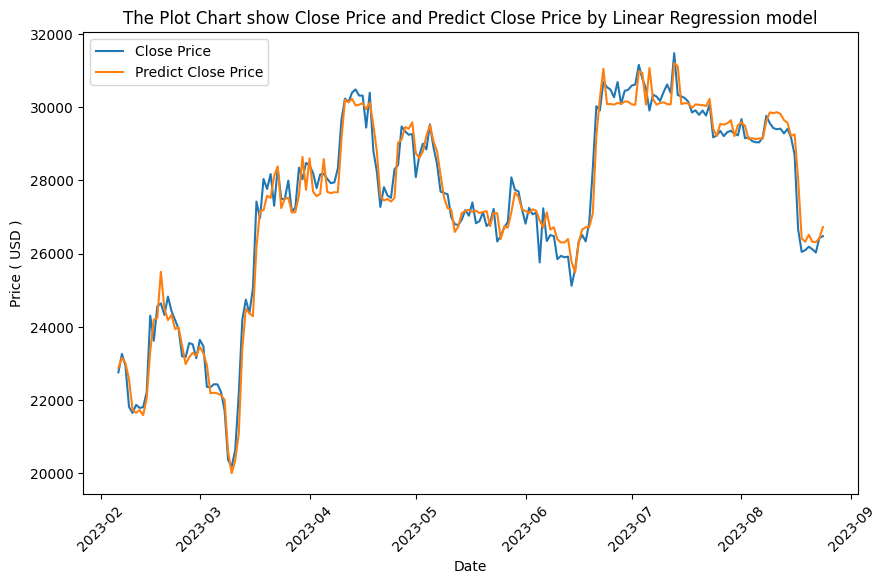

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_data['Date'],y_test,label='Close Price')
plt.plot(test_data['Date'],y_pred,label='Predict Close Price')
plt.xlabel('Date')
plt.ylabel('Price ( USD )')
plt.xticks(rotation=45)
plt.title('The Plot Chart show Close Price and Predict Close Price by Linear Regression model')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 175455.81052639752
Root Mean Squared Error: 418.87445676049225
Mean Absolute Error: 320.587760739604
R-squared: 0.9738648207831002
